In [1]:
import os
import zipfile
import shutil

import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'/aiffel/aiffel/workplace/2023SNU_Maic'

In [3]:
# input_path = '/aiffel/aiffel/workplace/2023SNU_Maic/MAIC2023-20230916T025150Z-001.zip' 
# output_path = '/aiffel/aiffel/workplace/2023SNU_Maic/MAIC2023'


# # 압축 해제
# with zipfile.ZipFile('MAIC2023-20230916T025150Z-001.zip') as z:
#     z.extractall(path=output_path)

    
# # 압축 해제된 파일 목록 확인
# extracted_files = os.listdir(output_path)
# print(extracted_files)

In [4]:
# !unzip -uq "ecg_adult_train.zip" -d "MAIC2023/ECG_adult_numpy_train"

In [3]:
# 일단 요건 테스트
test_a = np.load('./MAIC2023/ECG_child_numpy_train/ecg_child_0.npy')  # child부분을 adult로 바꿔서도 출력 가능
test_a

array([76. , 76. , 76. , ..., 19.5, 19.5, 19. ])

In [4]:
ca = pd.read_csv('./MAIC2023/ECG_child_age_train.csv')
ca.tail()

,FILENAME,GENDER,AGE
8776,ecg_child_8776,MALE,0.666667
8777,ecg_child_8777,MALE,0.083333
8778,ecg_child_8778,FEMALE,5.833333
8779,ecg_child_8779,FEMALE,2.250000
8780,ecg_child_8780,MALE,4.500000


In [5]:
aa = pd.read_csv('./MAIC2023/ECG_adult_age_train.csv')
aa.tail()

,FILENAME,GENDER,AGE
34902,ecg_adult_35136,MALE,19
34903,ecg_adult_35137,FEMALE,63
34904,ecg_adult_35138,MALE,60
34905,ecg_adult_35139,FEMALE,60
34906,ecg_adult_35140,MALE,53


In [6]:
# concat 하는 코드 
ECG_adult_numpy_train_folder_path = './MAIC2023/ECG_adult_numpy_train/'
ECG_adult_numpy_train_files = os.listdir(ECG_adult_numpy_train_folder_path)

ECG_child_numpy_train_folder_path = './MAIC2023/ECG_child_numpy_train/'
ECG_child_numpy_train_files = os.listdir(ECG_child_numpy_train_folder_path)

lead = ['I','II', 'III','V1','V2','V3','V4','V5','V6','aVR','aVL', 'aVF']


for l in lead:
    ca[l] = np.nan
    
# for l in lead:
#     aa[l] = np.nan
# 이거 분리하는게 좋을것 같긴한데..


# adult는  34907 rows
# adult_total_len = len(ECG_adult_numpy_train_files)
# for idx, file_path in enumerate(ECG_adult_numpy_train_files):
#     file_name = file_path.split('.')[0]
#     if not idx % 1000:
#         print(idx, (idx / adult_total_len) * 100, '%')
#     if '.npy' in file_path:        
#         npy = np.load(ECG_adult_numpy_train_folder_path + file_path)
        
#         for i in range(len(lead)):
#             a[aa['FILENAME'] == file_name].index
#             aa.loc[aa_idx, lead[i]] = npy[i]
                

# child_total_len = len(ECG_child_numpy_train_files)
# print('child_total_len:', child_total_len)
# for idx, file_path in enumerate(ECG_child_numpy_train_files):
#     file_name = file_path.split('.')[0]
                                     
#     if not idx % 1000:
#         print(idx, (idx / child_total_len) * 100, '%')
        
#     if '.npy' in file_path:        
#         npy = np.load(ECG_child_numpy_train_folder_path + file_path)
        
#         for i in range(len(lead)):
#             ca_idx = ca[ca['FILENAME'] == file_name].index
#             ca.loc[ca_idx, lead[i]] = npy[i]      

def def_name(df, folder_path, file_paths):
    data_dict = dict()
    
    total_len = len(file_paths)
    print('total_len:', total_len)
    for idx, file_path in enumerate(file_paths):
        file_name = file_path.split('.')[0]

        if not idx % 1000 and idx > 0:
            print(idx, (idx / total_len) * 100, '%')
            break
            
        if '.npy' in file_path:        
            npy = np.load(folder_path + file_path)

            idx = df[df['FILENAME'] == file_name].index

            # df
            for i in range(len(lead)):
                df.loc[idx, lead[i]] = np.array2string(npy[i * 5000:(i + 1) * 5000], threshold=0)[1:-1]
                
    print('end')
#             json(dict)
#             age = float(df[df['FILENAME'] == file_name]['AGE'])
#             gen1 = df.loc[idx, 'GENDER'].to_string()[-4:]
#             lead_data = {'age': age, 'gender': gen1}
            
#             for i in range(len(lead)):
#                 lead_data[lead[i]] = list(npy[i * 5000:(i + 1) * 5000])
#                 data_dict[file_name] = lead_data
                
#     return data_dict
# c_dict = def_name(ca, ECG_child_numpy_train_folder_path, ECG_child_numpy_train_files)

# ad = def_name(aa, ECG_adult_numpy_train_folder_path, ECG_adult_numpy_train_files)

def_name(ca, ECG_child_numpy_train_folder_path, ECG_child_numpy_train_files)

total_len: 8781
1000 11.388224575788634 %
end


In [8]:
for v in ca.iterrows():
    print(v[1]['I'])
    break

nan


In [10]:
ca.to_csv('./MAIC2023/child_con.csv')  # 이게 새로 제대로 concat한 데이터

In [11]:
cdf = pd.read_csv('./MAIC2023/child_train_con.csv', index_col = 0)
adf = pd.read_csv('./MAIC2023/adult_train_con.csv',  index_col = 0)

In [12]:
adf = adf[['FILENAME', 'GENDER', 'AGE', 'I', 'II', 'III', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'aVR', 'aVL', 'aVF']]
adf

,FILENAME,GENDER,AGE,I,II,III,V1,V2,V3,V4,V5,V6,aVR,aVL,aVF
0,ecg_adult_0,MALE,53,12.0,12.0,12.0,12.0,11.0,10.0,9.0,8.0,8.0,8.0,8.0,7.0
1,ecg_adult_1,MALE,68,-2.0,-2.0,-2.0,-2.0,-4.0,-4.0,-4.0,-4.0,-2.0,-2.0,-2.0,-2.0
2,ecg_adult_2,MALE,68,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-10.0,-12.0,-12.0,-12.0,-12.0
3,ecg_adult_3,MALE,89,-6.0,-6.0,-6.0,-5.0,-7.0,-7.0,-7.0,-7.0,-9.0,-9.0,-9.0,-9.0
4,ecg_adult_4,MALE,79,2.0,2.0,2.0,2.0,4.0,6.0,8.0,10.0,8.0,6.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34902,ecg_adult_35136,MALE,19,-16.0,-16.0,-16.0,-16.0,-14.0,-14.0,-14.0,-14.0,-16.0,-16.0,-16.0,-16.0
34903,ecg_adult_35137,FEMALE,63,11.0,12.0,12.0,12.0,12.0,13.0,13.0,13.0,11.0,11.0,11.0,11.0
34904,ecg_adult_35138,MALE,60,-10.0,-10.0,-10.0,-10.0,-12.0,-12.0,-12.0,-12.0,-10.0,-10.0,-10.0,-10.0
34905,ecg_adult_35139,FEMALE,60,0.0,0.0,0.0,0.0,-1.0,-2.0,-3.0,-4.0,-4.0,-4.0,-4.0,-4.0


In [ ]:
cdf.describe()

In [ ]:
adf.describe()

In [ ]:
df = pd.concat([adf, cdf], axis=0)
df

In [ ]:
numerical_features = df._get_numeric_data().columns

# categorical_features = test_.drop(numerical_features, axis = 1).drop('lesion_3', axis = 1).columns

In [ ]:
print(len(numerical_features))
numerical_features

In [ ]:
sns.set_theme(style='dark', palette='magma')
pal = sns.color_palette('magma')


fig, ax = plt.subplots(7, 2, figsize = (15, 20), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(numerical_features):
    if i == 13:
        break
    
    sns.kdeplot(adf[column], ax=ax[i], color=pal[0])
    sns.kdeplot(cdf[column], ax=ax[i], color=pal[2], warn_singular = False)
    
    ax[i].set_title(f'{column} Distribution', size = 14)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 20, fontweight = 'bold')
fig.legend(['adult', 'child'])
plt.tight_layout()

In [ ]:
corr_matrix1 = adf[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix1, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix1, mask=mask, annot=True, cmap='spring', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Adult', fontsize=15)
plt.show()

In [ ]:
corr_matrix2 = cdf[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix2, mask=mask, annot=True, cmap='spring', fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Child', fontsize=15)
plt.show()

#### AGE를 자세히 보자

In [ ]:
adf.AGE.describe()

In [ ]:
plt.hist(adf['AGE'], label='#of people')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend()
plt.show()

In [ ]:
data = adf.sort_values(by='AGE')
data

In [ ]:
total_count = len(data)

people_per_group = total_count // 3


# 세 연령대에 대한 데이터를 나눕니다.
age_group1 = data.iloc[:people_per_group]
age_group2 = data.iloc[people_per_group:2 * people_per_group]
age_group3 = data.iloc[2 * people_per_group:]

# 결과를 확인합니다.
print("Age Group 1:")
print(len(age_group1))

print("Age Group 2:")
# print(age_group2.head())
print(len(age_group2))

print("Age Group 3:")
# print(age_group3.head())
print(len(age_group3))

In [ ]:
adf[(adf['AGE']>=19) & (adf['AGE']<=56)]   # 11665명
adf[(adf['AGE']>=57) & (adf['AGE']<=69)]  # 11329명
adf[(adf['AGE']>=70) & (adf['AGE']<=122)]  # 11913명

### Signal Processing

In [13]:
os.getcwd()

'/aiffel/aiffel/workplace/2023SNU_Maic'

In [14]:
c170 = np.load('./MAIC2023/ECG_child_numpy_train/ecg_child_170.npy')
c170.shape

(60000,)

In [15]:
lead = ['I','II', 'III','V1','V2','V3','V4','V5','V6','aVR','aVL', 'aVF']
def ecg_dict(array):
    ecg = dict()
    for i in range(len(lead)):
        ecg[lead[i]] = array[5000 * i : 5000 * (i+1)]
    return ecg

In [16]:
d170 = ecg_dict(c170)
print(d170.keys())
d170

dict_keys(['I', 'II', 'III', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'aVR', 'aVL', 'aVF'])


{'I': array([ -9., -10., -10., ..., -19., -17., -19.]),
 'II': array([-20., -20., -20., ..., -29., -29., -29.]),
 'III': array([-11., -10., -10., ..., -10., -12., -10.]),
 'V1': array([-1., -1., -1., ..., -3., -3., -3.]),
 'V2': array([-16., -17., -17., ...,  19.,  19.,  20.]),
 'V3': array([-15., -16., -17., ...,  -7.,  -5.,  -4.]),
 'V4': array([-22., -22., -22., ...,  -5.,  -5.,  -5.]),
 'V5': array([-26., -26., -27., ...,  -8.,  -7.,  -7.]),
 'V6': array([-20., -21., -21., ..., -14., -16., -14.]),
 'aVR': array([14.5, 15. , 15. , ..., 24. , 23. , 24. ]),
 'aVL': array([ 1. ,  0. ,  0. , ..., -4.5, -2.5, -4.5]),
 'aVF': array([-15.5, -15. , -15. , ..., -19.5, -20.5, -19.5])}

In [17]:
d170['I'] == c170[:5000]

array([ True,  True,  True, ...,  True,  True,  True])

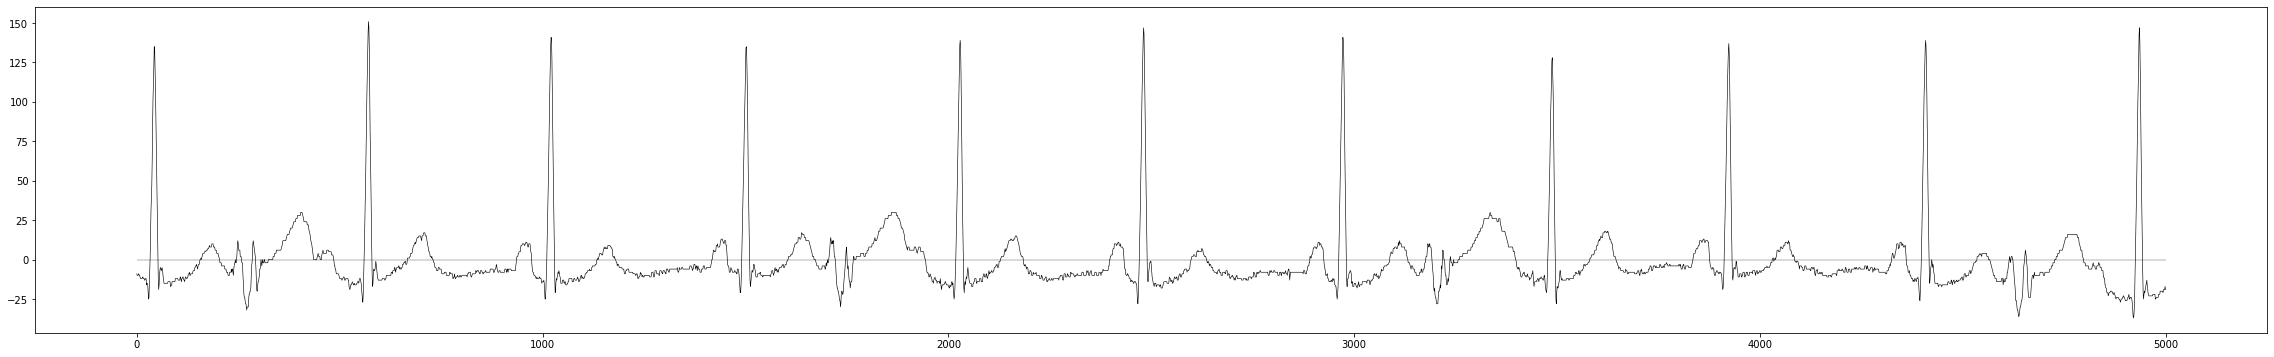

In [18]:
plt.figure(figsize=(40,6))
plt.plot(d170['I'], color='black', linewidth=0.6)
plt.hlines(0,0,5000,color='black', linewidth=0.3)

In [ ]:
signal = ecg_dict.lead['I']
plt.figure(figsize=(40,6))


5000
[-4.33632077 -4.27954715 -4.24965188 ... -5.24895091 -5.12185801
 -5.00272583]


/opt/conda/lib/python3.9/site-packages/pywt/_multilevel.py:148: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  a = a[[slice(s) for s in d.shape]]


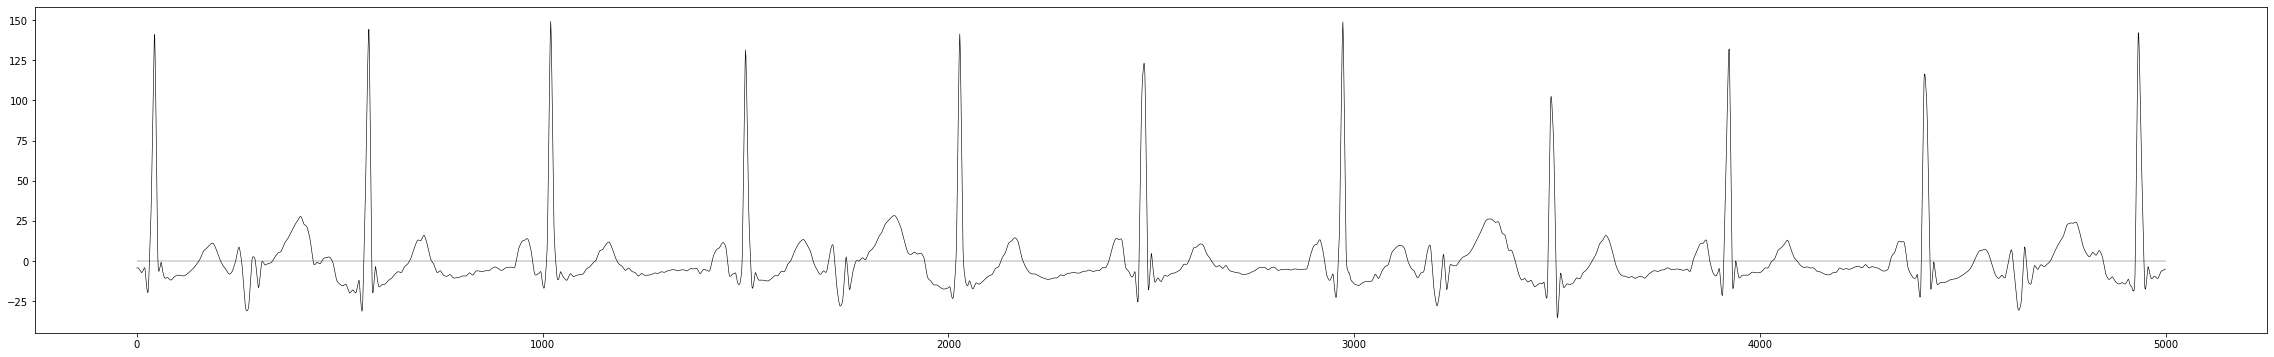

In [19]:
import pywt

def denoise_signal(X, dwt_transform='bior4.4', dlevels=9, cutoff_low=1, cutoff_high=7):
    """
    노이즈 제거 함수
    
    @ param X : 데이터 5천개 리스트
    return : 데이터 5천개에 대한 노이즈 제거한 리스트
    """
    
    coeffs = pywt.wavedec(X, dwt_transform, level=dlevels)   # wavelet transform 'bior4.4'
    # scale 0 to cutoff_low 
    for ca in range(0,cutoff_low):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    # scale cutoff_high to end
    for ca in range(cutoff_high, len(coeffs)):
        coeffs[ca]=np.multiply(coeffs[ca],[0.0])
    Y = pywt.waverec(coeffs, dwt_transform) # inverse wavelet transform
    return Y 

signal_den = denoise_signal(d170['I'])
print(len(signal_den))          
print(signal_den)
plt.figure(figsize=(40,6))
plt.plot(signal_den, color='black', linewidth=0.6)
plt.hlines(0,0,5000,color='black', linewidth=0.3)

In [20]:
# dict
for key, value in c_dict.items():
    temp_dict = dict()
    for k, v in value.items():
        if k not in ['age', 'gender']:
            c_dict[key][k] = denoise_signal(c_dict[key][k])
    break

NameError: name 'c_dict' is not defined

In [ ]:
def dict_yield():
    yield c_dict.items()

c_yield = dict_yield()
for k, v in next(c_yield):
    for k1, v1 in v.items():
        if k1 not in ['age', 'gender']:
            print(len(v1))
    break

In [ ]:
# 자동화해보려다가 망한것

fig,ax = plt.subplots(12,1, figsize=(20,12*4))
#fig.set_dpi(150)
for i in range(0,12):
    _key = lead[i]
    #ax[i].set_title(_key)
    ax[i].plot(ecg_dict.signald[_key], color='black', linewidth=0.6)
    ax[i].set_ylim((-1500,1500))
    ax[i].set_xticks(   np.arange(0,5001,500)  )   
    ax[i].set_xticklabels(   np.arange(0,5001,500)/BASIC_SRATE  )   
    ax[i].grid(axis='x')
    ax[i].annotate(_key,(-200,0))
    #ax[i].set_xlabel('Time(sec)')
    #ax[i].set_ylabel('mV')
    ax[i].hlines(0,0,5000,color='black', linewidth=0.3)


plt.show()

#### 예시 from official document

In [ ]:
!pip install neurokit2

In [ ]:
import neurokit2 as nk

In [ ]:
nk.data('')

In [ ]:
ecg = nk.ecg_simulate(duration=15, sampling_rate=6000, heart_rate=80)
signals, info = nk.ecg_process(ecg, sampling_rate=6000)
nk.ecg_plot(signals, info)

In [ ]:
ecg1 = nk.ecg_simulate(duration=10, method="simple")

ecg2 = nk.ecg_simulate(duration=10, method="ecgsyn")

# Visualize result
nk.signal_plot([ecg1, ecg2], labels=["simple", "ecgsyn"], subplots=True)

In [ ]:
ecg = nk.ecg_simulate(duration=10, sampling_rate=250, noise=0.2)

ecg += np.random.normal(0, 0.1, len(ecg))  # Add Gaussian noise

signals = pd.DataFrame({
    "ECG_Raw" : ecg,
    "ECG_NeuroKit" : nk.ecg_clean(ecg, sampling_rate=250, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg, sampling_rate=250, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg, sampling_rate=250, method="pantompkins1985"),
    "ECG_Hamilton" : nk.ecg_clean(ecg, sampling_rate=250, method="hamilton2002"),
    "ECG_Elgendi" : nk.ecg_clean(ecg, sampling_rate=250, method="elgendi2010"),
    "ECG_EngZeeMod" : nk.ecg_clean(ecg, sampling_rate=250, method="engzeemod2012"),
    "ECG_TC" : nk.ecg_clean(ecg, sampling_rate=250, method="templateconvolution")
})


In [ ]:
signals

#### 시도해보려다가 못한것

https://pubmed.ncbi.nlm.nih.gov/12820525/
"aVL, III, V4, and aVF while leads aVL and V2 are peculiar for women."

"An elongation of the intervals Q-T and R-R as well as the segment S-T is observed in ECG of men and women with ageing of inhabitants of the European North since 20-29 to 50-59 years old demonstrated an appearance of symptoms of hypertrophy of the heart departments, a heart electrical axis deviation to more left position, "